# Reconocimiento de dígitos escritos a mano

In [75]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

## Paso 1. Cargar la información

In [76]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Paso 2 y 3. Comprender la información y modificarla

Recibimos una lista con 60mil ejemplos. En esa lista, tenemos una matriz (arreglo de arreglos) de 28x28. Para que una red neuronal normal pueda recibir como entrada esto, necesita recibir un vector, por lo que vamos a convertir la matrix en un vector de 784 (28x28). Luego, vamos a escalar los valores para que estén entre 0 y 1.

In [77]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [78]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [79]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


La siguiente función lo que hace es mostrar un dígito. Veamos como se ve el primer dígito de nuestro dataset como imagen, luego su valor en x y finalmente su valor en y.

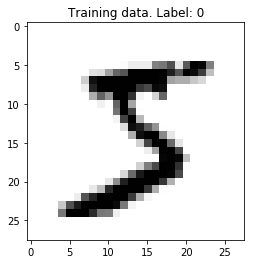

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_digit(index):
    label = y_train[index].argmax(axis=0)
    image = x_train[index].reshape([28,28])
    plt.title('Training data. Label: {}'.format(label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
show_digit(0)

In [83]:
x_train[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [84]:
y_train[0]

5

### One-hot encoding

Ya has visto cómo se hace one-hot encoding. Utiliza el método ```keras.utils.to_categorical```para convertir y_train y y_test en vectores de 10 valores en vez de un valor.

https://keras.io/utils/#to_categorical

In [85]:
## TODO: Has el one hot encoding para que 5 se convierta en [0, 0, 0, 0, 1, 0, 0, 0, 0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

## Paso 4. Construir Arquitectura del Modelo

In [ ]:
## TODO: Construye un modelo secuencial
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

## TODO: Compila el modelo con un optimizador y una función de pérdida
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

## Paso 5. Entrenamos el modelo

Intenta lograr más de 97% de precisión.

In [87]:
## TODO: Corre el modelo. Experimenta con diferentes tamaños de batch y número de epochs. 
# Usa verbose=2 para ver cómo va progresando el modelo.
# Empieza con 2 ó 3 epochs. Este es un algoritmo pesado. Al final intenta con 10 epochs.

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=3,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 13s 222us/step - loss: 0.2462 - acc: 0.9228 - val_loss: 0.1013 - val_acc: 0.9685
Epoch 2/3
60000/60000 [==============================] - 13s 219us/step - loss: 0.1033 - acc: 0.9689 - val_loss: 0.0860 - val_acc: 0.9740
Epoch 3/3
60000/60000 [==============================] - 14s 232us/step - loss: 0.0730 - acc: 0.9775 - val_loss: 0.0944 - val_acc: 0.9736


## Paso 6. Evaluamos el modelo

In [90]:
## TODO: Evalua tu modelo
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9736


## Soluciones: No las revises hasta haber terminado

In [ ]:
## TODO: Has el one hot encoding para que 5 se convierta en [0, 0, 0, 0, 1, 0, 0, 0, 0]
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_train[0]

## TODO: Construye un modelo secuencial
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

## TODO: Compila el modelo con un optimizador y una función de pérdida
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

## TODO: Corre el modelo. Experimenta con diferentes tamaños de batch y número de epochs. 
# Usa verbose=2 para ver cómo va progresando el modelo.
# Empieza con 2 ó 3 epochs. Este es un algoritmo pesado. Al final intenta con 10 epochs.

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=3,
                    verbose=1,
                    validation_data=(x_test, y_test))

## TODO: Evalua tu modelo
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])